# Parte B – Análisis de Texto del PDF
**Documento:** Tipos de Datos en Ciencia de Datos

Esta notebook realiza extracción, preprocesamiento, análisis y visualización de texto a partir de un archivo PDF.


In [1]:
# Instalar librerías necesarias (solo en Colab o primera vez)
!pip install pdfplumber nltk wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 435.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 60.7 MB/s eta 0:00:00


In [2]:
# Importar librerías
import pdfplumber
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import re
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 1. Cargar y extraer texto del PDF
Asegúrate de subir el archivo PDF antes de ejecutar esta celda.

In [11]:
# Extraer texto
texto = ""
with pdfplumber.open("Ciencia de datos - Tipos de datos.pdf") as pdf:
    for page in pdf.pages:
        texto += page.extract_text() + " "

print(texto[:1000])  # Vista previa

CIENCIA DE DATOS - TIPOS DE DATOS
Tanto en Data Science como en Big Data, se encontrará con muchos tipos diferentes de datos, y cada uno
de ellos tiende a requerir diferentes herramientas y técnicas. Las principales categorías de tipos de datos
son las siguientes:
Datos estructurados
Datos no estructurados
Lenguaje natural
Generado por máquina
Basado en gráficos
Audio, video e imágenes
Ahora vamos a explorar todos estos tipos de datos interesantes.
Datos Estructurados
Los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro
de un registro. Como tal, a menudo es fácil almacenar datos estructurados en tablas dentro de bases de datos
o archivos de Excel como en la siguiente imagen. SQL es la forma preferida de administrar y consultar
datos que residen en bases de datos. También puede encontrar datos estructurados que podrían dificultar su
almacenamiento en una base de datos relacional tradicional. Los datos jerárquicos, como puede ser un árbol

## 2. Preprocesamiento de texto
Transformamos el texto: minúsculas, sin puntuación, tokenización, stopwords y lematización.

In [12]:
texto = texto.lower()
texto = re.sub(r'\d+', '', texto)
texto = texto.translate(str.maketrans('', '', string.punctuation))

tokens = word_tokenize(texto)
stop_words = set(stopwords.words('spanish'))
palabras_filtradas = [w for w in tokens if w not in stop_words and len(w) > 2]

lemmatizer = WordNetLemmatizer()
palabras_lema = [lemmatizer.lemmatize(p) for p in palabras_filtradas]

print(texto[:1000])  # Vista previa

ciencia de datos  tipos de datos
tanto en data science como en big data se encontrará con muchos tipos diferentes de datos y cada uno
de ellos tiende a requerir diferentes herramientas y técnicas las principales categorías de tipos de datos
son las siguientes
datos estructurados
datos no estructurados
lenguaje natural
generado por máquina
basado en gráficos
audio video e imágenes
ahora vamos a explorar todos estos tipos de datos interesantes
datos estructurados
los datos estructurados son datos que dependen de un modelo de datos y residen en un campo fijo dentro
de un registro como tal a menudo es fácil almacenar datos estructurados en tablas dentro de bases de datos
o archivos de excel como en la siguiente imagen sql es la forma preferida de administrar y consultar
datos que residen en bases de datos también puede encontrar datos estructurados que podrían dificultar su
almacenamiento en una base de datos relacional tradicional los datos jerárquicos como puede ser un árbol
genealógico


## 3. Frecuencia de palabras

In [8]:
frecuencia = Counter(palabras_lema)
frecuencia.most_common(10)

[('datos', 43),
 ('estructurados', 11),
 ('gráficos', 11),
 ('natural', 7),
 ('ejemplo', 7),
 ('lenguaje', 6),
 ('puede', 6),
 ('ser', 6),
 ('persona', 6),
 ('máquinas', 6)]

## 4. Nube de palabras

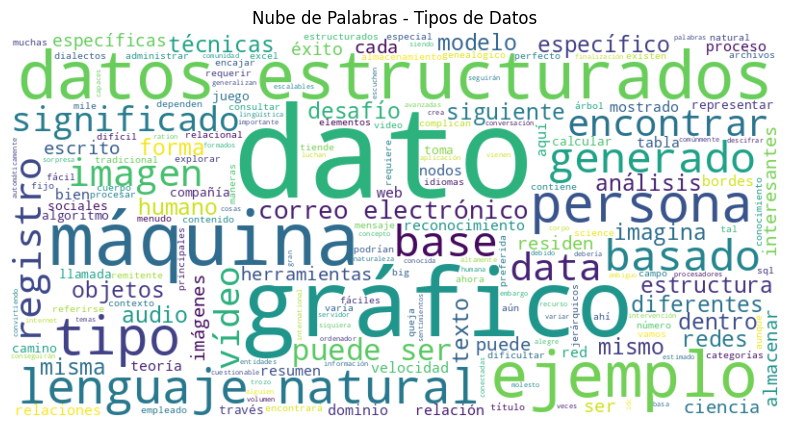

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(palabras_lema))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Tipos de Datos")
plt.show()

## 5. Conclusión
- Se extrajeron palabras clave del documento.
- Se visualizaron en forma de nube y por frecuencia.
- Se aplicaron técnicas básicas de PLN: tokenización, stopwords y lematización.
